## LABORATORIO 2 - GRUPO 6
# CIUDADANIA DIGITAL
> La ciudadanía digital es el espacio donde es posible aprender, certificarse y entrar en contacto con otras personas interesadas en transformar digital y productivamente sus vidas.
### INTEGRANTES DEL EQUIPO
* MARIA PAULA MOGOLLON
* SERGIO NICOLAS QUINTERO
* LIDA VIVIANA PINEDA


> Para el ejercio vamos a utilizar la fuente de ***gov.co*** que se llama *Ciudadania Digital*
> Enlace: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Ciudadan-a-Digital/g4cd-bvpd/about_data

In [1]:
# Importar librerias
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3



<pre>Se realiza la generación del data set para _Ciudadania Digital_ para iniciar la validación de la información</pre>

In [2]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df_Ciudadania_digital = pd.read_csv('C:/Users/User/Documents/ejercicios python/Laboratorio2/data/Ciudadan_a_Digital_20240418.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente.")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
    
    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se pudo encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:
    
    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

C:\Users\User\AppData\Local\Temp\ipykernel_20820\2562203358.py:3: DtypeWarning: Columns (3,7,8,20,26,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Ciudadania_digital = pd.read_csv('C:/Users/User/Documents/ejercicios python/Laboratorio2/data/Ciudadan_a_Digital_20240418.csv')


El dataset se cargó exitosamente.


* Se detecta durante la lectura del archivo, que existen 6 columnas que tienen datos mixtos, las cuales se deben ajustar

In [3]:
#Consulta y creación de data set, para validar cantidad de columnas y datos a trabajar
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_Ciudadania_digital = pd.DataFrame(df_Ciudadania_digital)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_Ciudadania_digital.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El DataFrame, tiene {num_rows} filas y {num_cols} columnas.')

El DataFrame, tiene 1058349 filas y 49 columnas.


In [4]:
#se realiza la revisiòn de 10 registros aleatorios para validar lo de las primeras columnas identificadas
df_Ciudadania_digital.sample(10)

,TIPO DE DOCUMENTO,DOCUMENTO,NOMBRES,APELLIDOS,EMAIL,CELULAR,TELEFONO,DEPARTAMENTO NACIMIENTO,CIUDAD DE NACIMIENTO,DEPARTAME_NOMBRE,...,VIRTUAL,ID INDICADOR,FechaCorte,FECHA VIGENCIA,META,INVERSION,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
161881,Cedula de Ciudadania,False,EMIYOLENI,CASTA�O,False,False,False,NaN,NaN,Caquet�,...,0,3987,2012-12-31,2012-12-31,1000,",00",18150,NaN,NaN,NaN
335229,Cedula de Ciudadania,False,EDUAR ANDRES,GONZALEZ MONJE,False,False,False,NaN,NaN,Huila,...,0,3987,2013-12-31,2013-12-31,1000,",00",73268,NaN,NaN,NaN
683976,CC,False,SERGIO,REBOLLEDO,False,False,False,ATLANTICO,BARRANQUILLA,ATLANTICO,...,0,4783,2017-12-31,2017-12-31,432000,NaN,8001,NaN,NaN,NaN
1058124,Cedula de Ciudadania,False,DANIEL OSWALDO,NaN,False,False,False,NaN,NaN,Huila,...,0,3987,2013-12-31,2013-12-31,1000,",00",41001,NaN,NaN,NaN
794256,Cedula de Ciudadania,False,Gustavo,Silva Ramirez,False,False,False,NaN,NaN,Atl�ntico,...,0,3987,2013-12-31,2013-12-31,1000,",00",8001,NaN,NaN,NaN
999495,Cedula de Ciudadania,False,Luz Nayibe,NaN,False,False,False,NaN,NaN,Guaviare,...,0,3987,2013-12-31,2013-12-31,1000,",00",5045,NaN,NaN,NaN
168623,C�dula de Ciudadan�a,False,ORLIS ORLANDO,CASTILLO TENORIO,False,False,False,NaN,NaN,VALLE DEL CAUCA,...,0,3987,2011-12-31,2011-12-31,1000,",00",76001,NaN,NaN,NaN
969191,Cedula de Ciudadania,False,Angie Paola,NaN,False,False,False,NaN,NaN,C�rdoba,...,0,3987,2013-12-31,2013-12-31,1000,",00",23001,NaN,NaN,NaN
617500,Cedula de Ciudadania,False,Walter,Pearson,False,False,False,NaN,NaN,Cesar,...,0,3987,2012-12-31,2012-12-31,1000,",00",20001,NaN,NaN,NaN
549052,TI,False,MARIA JOSE,NARVAEZ ORELLANO,False,False,False,NaN,NaN,MAGDALENA,...,5,6632,2019-12-31,2019-12-31,0,",00",47001,NaN,NaN,NaN


In [5]:
#se realiza listado de las columnas, para identificar columnas a utilizar dentro del analisis
df_Ciudadania_digital.columns

Index(['TIPO DE DOCUMENTO', 'DOCUMENTO', 'NOMBRES', 'APELLIDOS', 'EMAIL',
       'CELULAR', 'TELEFONO', 'DEPARTAMENTO NACIMIENTO',
       'CIUDAD DE NACIMIENTO', 'DEPARTAME_NOMBRE', 'MUNICIPIO_NOMBRE',
       'DIRECCION', 'NIVEL EDUCATIVO', 'SECTOR', 'ESTRATO',
       'FECHA DE NACIMIENTO', 'EDAD', 'EDAD 2', 'GENERO', 'DISCAPACIDAD',
       'ALIADO', 'SECTOR ECONOMICO', 'OCUPACION', 'FECHA DE REGISTRO',
       'COMUNIDAD ETNICA', 'F TICS', 'DINAMIZADOR', 'POBREZA',
       'CABEZA DE HOGAR', 'VICTIMA DE VIOLENCIA', 'VICTIMA INVIERNO', 'LGBTI',
       'VIVIENDA FRONTERIZA', 'SITUACION DE CALLE', 'DESPLAZADO',
       'DESMOVILIZADO REINSERTADO', 'CERTIFICACIONES', 'TIPO', 'PRESENCIAL',
       'VIRTUAL', 'ID INDICADOR', 'FechaCorte', 'FECHA VIGENCIA', 'META',
       'INVERSION', 'MUNICIPIO_COD', 'DEPARTAME_COD',
       'CODIGO DEPARTAMENTO NACIMIENTO', 'CODIGO MUNICIPIO NACIMIENTO'],
      dtype='object')

* Se realiza una primera validación de información detectando que los siguientes campos no tienen información
  * EDAD 2
  * DEPARTAMENTO CODE
  * CODIGO DEPARTAMENTO NACIMIENTO
  * CODIGO MUNICIPIO DEPARTAMENTO
* Se identifica que hay nombres y apellido de personas, por normas de seguridad información se eliminara esta informaciòn

In [6]:
## revisión información general del conjunto de datos
df_Ciudadania_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058349 entries, 0 to 1058348
Data columns (total 49 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   TIPO DE DOCUMENTO               1058349 non-null  object 
 1   DOCUMENTO                       1058349 non-null  bool   
 2   NOMBRES                         1058345 non-null  object 
 3   APELLIDOS                       900200 non-null   object 
 4   EMAIL                           1058349 non-null  bool   
 5   CELULAR                         1058349 non-null  bool   
 6   TELEFONO                        1058349 non-null  bool   
 7   DEPARTAMENTO NACIMIENTO         285403 non-null   object 
 8   CIUDAD DE NACIMIENTO            285403 non-null   object 
 9   DEPARTAME_NOMBRE                853583 non-null   object 
 10  MUNICIPIO_NOMBRE                1031684 non-null  object 
 11  DIRECCION                       1058349 non-null  bool   
 12  

In [7]:
#validar las variables, y si pueden ser leidas por python
df_Ciudadania_digital.describe()

,EDAD 2,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
count,0.0,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,0.0,0.0,0.0
mean,NaN,1.782966e-02,8.803334e-03,7.862435e-02,5.573776e-03,8.163659e-04,1.703597e-03,2.271462e-03,2.579489e-04,6.293765e-03,2.532246e-04,9.694156e-02,4.983876e-01,4.324643e+03,1.093549e+05,4.011796e+04,NaN,NaN,NaN
std,NaN,1.323321e-01,9.341223e-02,2.691517e-01,7.444941e-02,2.856047e-02,4.123950e-02,4.760572e-02,1.605872e-02,7.908324e-02,1.591102e-02,2.958783e-01,1.905893e+00,6.185810e+02,1.857382e+05,2.820074e+04,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,1.000000e+03,1.300100e+04,NaN,NaN,NaN
50%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,1.000000e+03,2.781000e+04,NaN,NaN,NaN
75%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.783000e+03,6.200000e+04,6.800100e+04,NaN,NaN,NaN
max,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.400000e+01,6.632000e+03,4.320000e+05,9.977300e+04,NaN,NaN,NaN


In [8]:
# Descripción estadística de las variables numéricas sin notación científica

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas.
    # Se define función lambda que toma un número x y devuelve ese número formateado con 1 decimal.

pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_Ciudadania_digital.describe()

,EDAD 2,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
count,0.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,0.0,0.0,0.0
mean,NaN,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.5,4324.6,109354.9,40118.0,NaN,NaN,NaN
std,NaN,0.1,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.3,1.9,618.6,185738.2,28200.7,NaN,NaN,NaN
min,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,0.0,0.0,NaN,NaN,NaN
25%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,13001.0,NaN,NaN,NaN
50%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,27810.0,NaN,NaN,NaN
75%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4783.0,62000.0,68001.0,NaN,NaN,NaN
max,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34.0,6632.0,432000.0,99773.0,NaN,NaN,NaN


In [9]:
# Descripción de las variables categóricas

df_Ciudadania_digital.describe(include = ['object'])

,TIPO DE DOCUMENTO,NOMBRES,APELLIDOS,DEPARTAMENTO NACIMIENTO,CIUDAD DE NACIMIENTO,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,NIVEL EDUCATIVO,SECTOR,ESTRATO,...,ALIADO,SECTOR ECONOMICO,OCUPACION,FECHA DE REGISTRO,COMUNIDAD ETNICA,DINAMIZADOR,TIPO,FechaCorte,FECHA VIGENCIA,INVERSION
count,1058349,1058345,900200,285403,285403,853583,1031684,1058349,517441,1058349,...,262994,445678,681592,326544,546042,212957,62521,1058349,1058349,795356
unique,13,359937,438148,35,1010,75,1505,13,7,8,...,271,1864,6266,937,21,120,3,8,8,7
top,Cedula de Ciudadania,JUAN CARLOS,RODRIGUEZ,BOGOTA D. C.,BOGOTA D.C.,Antioquia,BOGOT� D.C.,No registra,Urbano,PENDIENTE CLASIFICAR,...,Computadores para Educar,No registra,Docente,2017-11-24 00:00:00.0000000,Ninguno,DIEGO FERNANDO CHAPARRO AYALA,VIRTUAL,2013-12-31,2013-12-31,",00"
freq,517457,3279,1966,87557,91891,50056,67351,520335,447115,523664,...,129188,174594,197023,30803,489905,68576,29483,365941,365941,795350


In [10]:
# Identificar valores únicos por  de Ciudadano Digital
print("\n Valores únicos por columna:")
for column in df_Ciudadania_digital.columns:
    unique_values = df_Ciudadania_digital[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("....")


 Valores únicos por columna:

TIPO DE DOCUMENTO (13 valores únicos):
['Cedula de Ciudadania' 'CC' 'C�dula de Ciudadan�a' 'TI'
 'Tarjeta de Identidad' 'Cedula de ciudadani�a' 'C�dula de ciudadan�a'
 'NUIP' 'PA' 'C�dula de Extranjer�a']
....

DOCUMENTO (1 valores únicos):
[False]

NOMBRES (359938 valores únicos):
['FERNANDEZ DE' 'CLEMENCIA INES' 'MARIA SULAY' 'MARIA DEL ROSARIO'
 'CAROLINA' 'SAMMY NATALIA' 'fredygarcia' 'EIDER ENRRIQUE' 'Jose Rodrigo'
 nan]
....

APELLIDOS (438149 valores únicos):
['0' '0LAYA REYES' '0RTEGA ORTIZ' '0SPINO PE�ATE' '0SSA' '1006456908'
 '11221617' '1143127905' '12114971' '2']
....

EMAIL (1 valores únicos):
[False]

CELULAR (2 valores únicos):
[False  True]

TELEFONO (2 valores únicos):
[False  True]

DEPARTAMENTO NACIMIENTO (36 valores únicos):
[nan 'BOYACA' 'VALLE DEL CAUCA' 'TOLIMA' 'LA GUAJIRA' 'MAGDALENA'
 'BOGOTA D. C.' 'CESAR' 'CUNDINAMARCA' '-']
....

CIUDAD DE NACIMIENTO (1011 valores únicos):
[nan 'PUERTO BOYACA' 'CALI' 'IBAGUE' 'RIOHACHA' 'SANTA

> Se realiza la eliminaciòn de apellidos y nombre

In [11]:
# Eliminar una columna por su Apellidos 
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['NOMBRES'])
print("\nDataFrame después de eliminar la columna 'NOMBRES':")


DataFrame después de eliminar la columna 'NOMBRES':


In [12]:
# Eliminar una columna por su Apellidos 
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['APELLIDOS'])
print("\nDataFrame después de eliminar la columna 'APELLIDOS':")



DataFrame después de eliminar la columna 'APELLIDOS':


> Se realiza la eliminación de EDAD 2

In [13]:
# Eliminar una columna por su EDAD 2
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['EDAD 2'])
print("\nDataFrame después de eliminar la columna 'EDAD 2':")


DataFrame después de eliminar la columna 'EDAD 2':


> se realiza la eliminacion de DEPARTAMENTO_CODE

In [14]:
# Eliminar una columna por su DEPARTAMENTO_CODE
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['DEPARTAME_COD'])
print("\nDataFrame después de eliminar la columna 'DEPARTAME_COD':")


DataFrame después de eliminar la columna 'DEPARTAME_COD':


> SE REALIZA LA ELIMINACIÒN DE DEPARTAMENTO NACIMIENTO

In [15]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['CODIGO DEPARTAMENTO NACIMIENTO'])
print("\nDataFrame después de eliminar la columna 'CODIGO DEPARTAMENTO NACIMIENTO':")


DataFrame después de eliminar la columna 'CODIGO DEPARTAMENTO NACIMIENTO':


> SE REALIZA LA ELIMINACIÒN DE CODIOG DE DEPARTAMENTO NACIMIENTO

In [16]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['CODIGO MUNICIPIO NACIMIENTO'])
print("\nDataFrame después de eliminar la columna 'CODIGO MUNICIPIO NACIMIENTO':")


DataFrame después de eliminar la columna 'CODIGO MUNICIPIO NACIMIENTO':


> SE REALIZA LA REVISIÓN DE COMO QUEDARON LOS DATOS NUMERICOS LUEGO DE ELIMINAR LOS VACIOS

In [17]:
#Se realiza revisiòn estadistica de datos resultantes
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_Ciudadania_digital.describe()

,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD
count,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0
mean,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.5,4324.6,109354.9,40118.0
std,0.1,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.3,1.9,618.6,185738.2,28200.7
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,13001.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,27810.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4783.0,62000.0,68001.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34.0,6632.0,432000.0,99773.0


> Realizamos diagrama de bigotes, y observamos que no es diciente la informaciòn, por lo que se decide, apra estos casos realizar diagrama de barras o torta dependiendo el caso

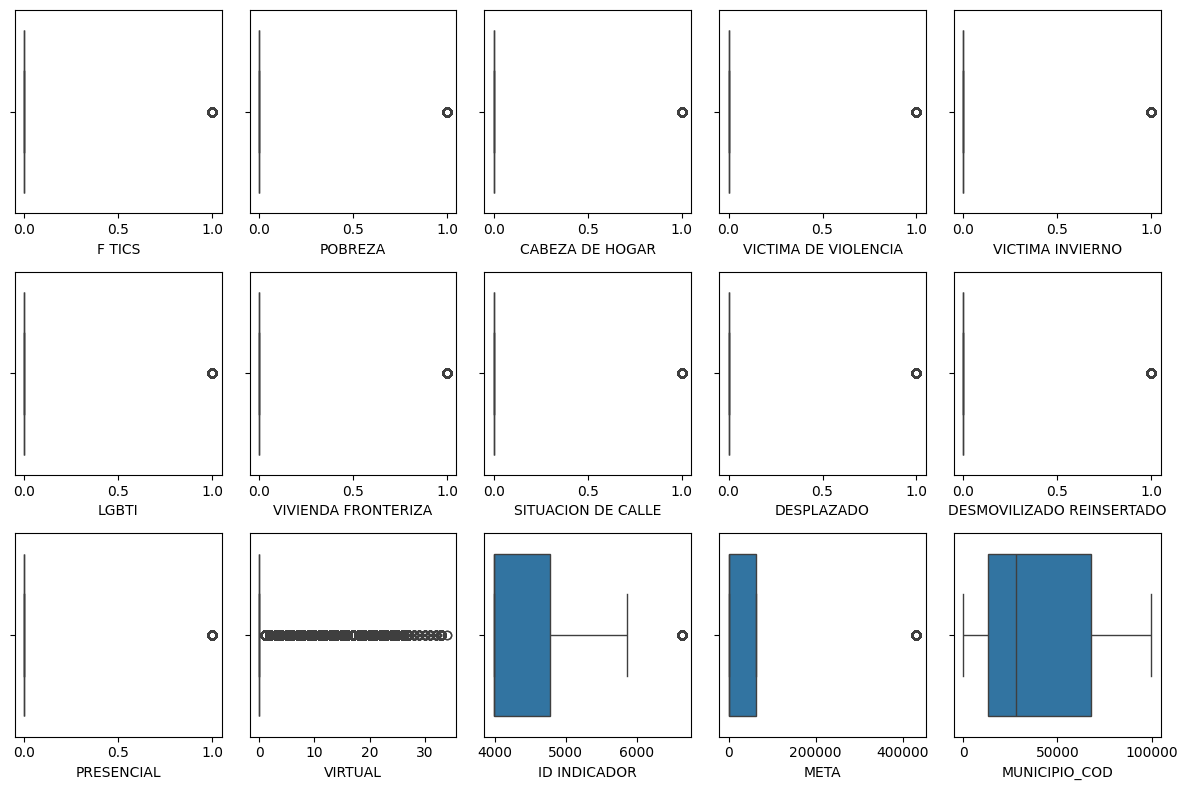

In [22]:
# Identificar valores atípicos en las variables numéricas
numeric_cols = df_Ciudadania_digital.select_dtypes(include=['float','int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(data = df_Ciudadania_digital, x = col)

plt.tight_layout()
plt.show()

> Se revisan los datos faltantes para cada una de las variables, con el fin de seguir definiendo los filtros

In [ ]:
# Análisis de valores faltantes por columna
datos_faltes = df_Ciudadania_digital.isnull().sum()
porcentajes_faltantes = (df_Ciudadania_digital.isnull().sum()/len(df_Ciudadania_digital))*100

faltantes_df = pd.DataFrame({
    'Valores faltes' : datos_faltes,
    'Porcentaje (%)': porcentajes_faltantes            
})

# Ordenar de manera descendente por porcentaje de valores faltantes
faltantes_df = faltantes_df.sort_values(by = 'Porcentaje (%)', ascending=False)
faltantes_df

,Valores faltes,Porcentaje (%)
TIPO,995828,94.1
DINAMIZADOR,845392,79.9
ALIADO,795355,75.2
DEPARTAMENTO NACIMIENTO,772946,73.0
CIUDAD DE NACIMIENTO,772946,73.0
FECHA DE REGISTRO,731805,69.1
SECTOR ECONOMICO,612671,57.9
EDAD,580971,54.9
FECHA DE NACIMIENTO,556002,52.5
SECTOR,540908,51.1


# LIMPIEZA DE LOS CAMPOS

> Limpieza del campo del tipo de documento

In [23]:
df_Ciudadania_digital['TIPO DE DOCUMENTO'].value_counts()

TIPO DE DOCUMENTO
Cedula de Ciudadania     517457
CC                       254270
C�dula de Ciudadan�a     162776
Tarjeta de Identidad      48787
TI                        48343
Cedula de ciudadani�a     22409
NUIP                       1838
C�dula de ciudadan�a       1728
PA                          296
NIT                         163
No registra                 153
C�dula de Extranjer�a        85
CE                           44
Name: count, dtype: int64

> Transformación de los datos


In [25]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'Cedula de Ciudadania'      : 'CC',
        'CC'                         : 'CC',
        'C�dula de Ciudadan�a'      : 'CC',
        'Tarjeta de Identidad'     : 'TI',
        'TI'                       : 'TI',
        'Cedula de ciudadani�a'   : 'CC',
        'NUIP'                     : 'NUIP',
        'C�dula de ciudadan�a'    : 'CC',
        'PA'                       : 'PA',
        'NIT'                      : 'NIT',
        'No registra'              : 'NO_REGISTRA',
        'C�dula de Extranjer�a'   : 'CE',
        'CE'                       : 'CE'
}

# Implementar la función .replace
df_Ciudadania_digital['TIPO DE DOCUMENTO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['TIPO DE DOCUMENTO'].value_counts()

TIPO DE DOCUMENTO
CC             958640
TI              97130
NUIP             1838
PA                296
NIT               163
NO_REGISTRA       153
CE                129
Name: count, dtype: int64

> Grafico de barras para validar 

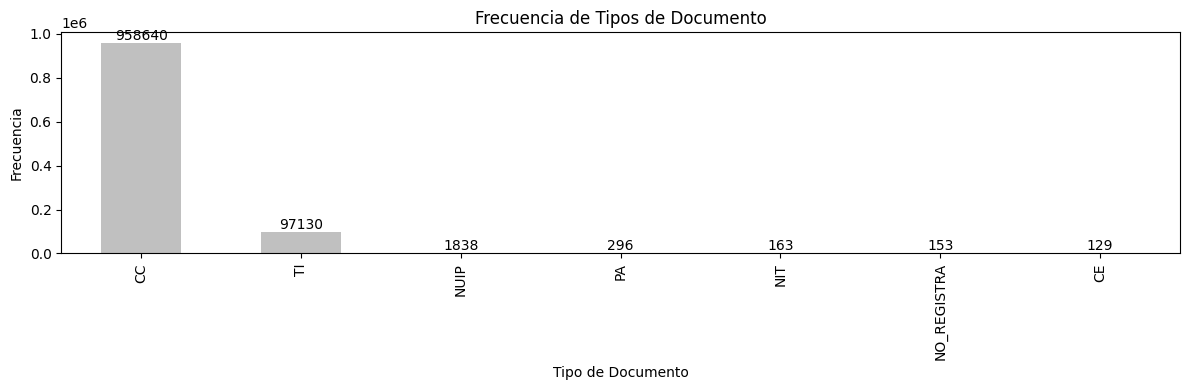

In [28]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
tipo_documento_counts = df_Ciudadania_digital['TIPO DE DOCUMENTO'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = tipo_documento_counts.plot(kind='bar', color='#C0C0C0')

# Añadir la cantidad en cada barra
for i, v in enumerate(tipo_documento_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Frecuencia de Tipos de Documento')
plt.xlabel('Tipo de Documento')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> VALIDACION DE SI LA PERSONA TIENE CELULAR

In [29]:
df_Ciudadania_digital['CELULAR'].value_counts()

CELULAR
False    1057934
True         415
Name: count, dtype: int64

> Creacion grafica

CELULAR
False    1057934
True         415
Name: count, dtype: int64


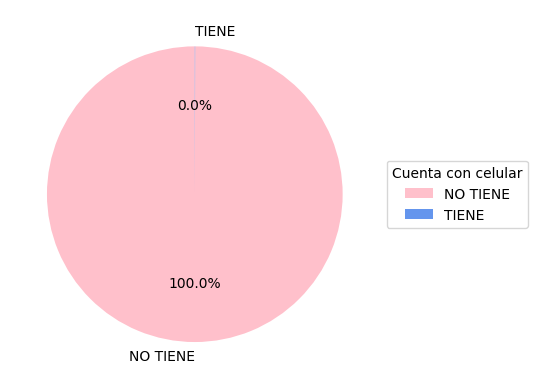

In [31]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_celular = df_Ciudadania_digital['CELULAR'].value_counts()

# establecer etiquetas y colores
etiquetas = ['NO TIENE', 'TIENE']
colores = ['#FFC0CB','#6495ED']

# crear gráfico de torta
plt.pie(df_celular, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Cuenta con celular', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_celular)

> CUENTA CON TELEFNO

In [32]:
df_Ciudadania_digital['TELEFONO'].value_counts()

TELEFONO
False    1058242
True         107
Name: count, dtype: int64

TELEFONO
False    1058242
True         107
Name: count, dtype: int64


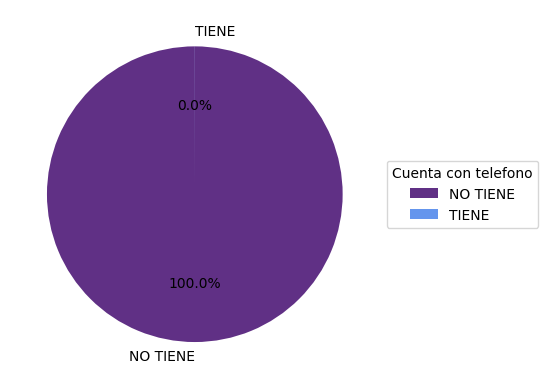

In [33]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_telefono = df_Ciudadania_digital['TELEFONO'].value_counts()

# establecer etiquetas y colores
etiquetas = ['NO TIENE', 'TIENE']
colores = ['#603085','#6495ED']

# crear gráfico de torta
plt.pie(df_telefono, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Cuenta con telefono', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_telefono)

> DEPARTAMENTO DE NACIMIENTO

In [34]:
df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'].value_counts()

DEPARTAMENTO NACIMIENTO
BOGOTA D. C.                      87557
CUNDINAMARCA                      26749
-                                 22409
ANTIOQUIA                         17362
VALLE DEL CAUCA                   16537
TOLIMA                             8928
SANTANDER                          8924
NORTE DE SANTANDER                 8090
QUINDIO                            8001
BOYACA                             7680
RISARALDA                          7082
CORDOBA                            5912
BOLIVAR                            5644
HUILA                              5232
NARIÑO                             5177
CALDAS                             4882
CAUCA                              4827
MAGDALENA                          4745
CESAR                              4533
ATLANTICO                          4497
META                               3946
CHOCO                              3397
LA GUAJIRA                         3254
SUCRE                              2460
CASANARE        

> Se reemplaza el registro  -

In [35]:
# reemplazar valores "-"
df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'] = df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'].replace('-','NO TIENE')

# contar registros de la columna 'ESTU_GENERO'
df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'].value_counts()

DEPARTAMENTO NACIMIENTO
BOGOTA D. C.                      87557
CUNDINAMARCA                      26749
NO TIENE                          22418
ANTIOQUIA                         17362
VALLE DEL CAUCA                   16537
TOLIMA                             8928
SANTANDER                          8924
NORTE DE SANTANDER                 8090
QUINDIO                            8001
BOYACA                             7680
RISARALDA                          7082
CORDOBA                            5912
BOLIVAR                            5644
HUILA                              5232
NARIÑO                             5177
CALDAS                             4882
CAUCA                              4827
MAGDALENA                          4745
CESAR                              4533
ATLANTICO                          4497
META                               3946
CHOCO                              3397
LA GUAJIRA                         3254
SUCRE                              2460
CASANARE        

> Validación de ciudad de nacimiento

In [52]:
df_Ciudadania_digital['CIUDAD DE NACIMIENTO'].unique().tolist()

[nan,
 'PUERTO BOYACA',
 'CALI',
 'IBAGUE',
 'RIOHACHA',
 'SANTA MARTA',
 'BOGOTA D.C.',
 'BOSCONIA',
 'CHIA',
 'OBANDO',
 '-',
 'PALMIRA',
 'CARTAGO',
 'MANIZALES',
 'QUIBDO',
 'TURBO',
 'MEDELLIN',
 'ARMENIA',
 'ALGARROBO',
 'ALMAGUER',
 'CUCUTA',
 'BOJAYA',
 'AGUAZUL',
 'BUESACO',
 'LA MESA',
 'SAN PABLO',
 'VILLAVICENCIO',
 'SINCELEJO',
 'ARENAL',
 'SAN BENITO ABAD',
 'LA MACARENA',
 'CONTRATACION',
 'SANTA ROSALIA',
 'BUCARAMANGA',
 'PUEBLO NUEVO',
 'MONTERIA',
 'TUTA',
 'VIJES',
 'BARRANQUILLA',
 'PAIPA',
 'SEVILLA',
 'LERIDA',
 'MARMATO',
 'GUADALAJARA DE BUGA',
 'PUEBLORRICO',
 'PUERTO WILCHES',
 'ANDALUCIA',
 'ACACIAS',
 'FLORENCIA',
 'GUADUAS',
 'PAMPLONA',
 'MIRAFLORES',
 'SOACHA',
 'VALLEDUPAR',
 'TRINIDAD',
 'LA SALINA',
 'EL ROSAL',
 'ARAUCA',
 'GüICAN',
 'AGUA DE DIOS',
 'CHIQUINQUIRA',
 'MACHETA',
 'CHOCONTA',
 'TUNJA',
 'MONIQUIRA',
 'PAZ DE ARIPORO',
 'PRADERA',
 'LENGUAZAQUE',
 'VILLA DE SAN DIEGO DE UBATE',
 'CHACHAGüI',
 'SALDAÑA',
 'NEIVA',
 'GIRARDOT',
 'FACATATI

> Validación departamento nombre

In [53]:
df_Ciudadania_digital['DEPARTAME_NOMBRE'].unique().tolist()

['Boyac�',
 'BOGOTA',
 nan,
 'ANTIOQUIA',
 'Casanare',
 'Cundinamarca',
 'Atl�ntico',
 'Huila',
 'CAUCA',
 'TOLIMA',
 'Putumayo',
 'Tolima',
 'Arauca',
 'BOYACA',
 'VALLE DEL CAUCA',
 'Meta',
 'La Guajira',
 'Cesar',
 'LA GUAJIRA',
 'MAGDALENA',
 'Magdalena',
 'CESAR',
 'CORDOBA',
 'C�rdoba',
 'Cauca',
 'Valle del Cauca',
 'CALDAS',
 'Antioquia',
 'Bogot� D.C.',
 'SUCRE',
 'Sucre',
 'Risaralda',
 'Choc�',
 'Caldas',
 'CHOCO',
 'Bol�var',
 'Nari�o',
 'QUINDIO',
 'RISARALDA',
 'Amazonas',
 'NORTE DE SANTANDER',
 'GUAVIARE',
 'META',
 'BOGOTA D. C.',
 'BOLIVAR',
 'CAQUETA',
 'PUTUMAYO',
 'Quind�o',
 'NARIÑO',
 'SANTANDER',
 'Santander',
 'VICHADA',
 'HUILA',
 'CUNDINAMARCA',
 'ATLANTICO',
 'Norte de Santander',
 'Caquet�',
 'Vichada',
 'SAN ANDRES',
 'San Andr�s y Providencia',
 'N. DE SANTANDER',
 'AMAZONAS',
 'CASANARE',
 'ARAUCA',
 'Guaviare',
 'Guain�a',
 'GUAINIA',
 'NARI�O',
 'DEPARTAMENTO ARCHIPIELAGO DE S',
 'Vaup�s',
 'VAUPES',
 'EXTERIOR',
 'SAN ANDRES Y PROVIDENCIA',
 'NO TIENE

> Se realiz ael filtro

In [69]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'Boyac�'                                                : 'Boyaca',
        'BOGOTA'                                                : 'Bogota',
        'nan'                                                   : 'No Informa',
        'ANTIOQUIA'                                             : 'Antioquia',
        'Casanare'                                              : 'Casanare',
        'Cundinamarca'                                          : 'Cundinamarca',
        'Atl�ntico'                                             : 'Atlantico',
        'Huila'                                                 : 'Huila',
        'CAUCA'                                                 : 'Cauca',
        'TOLIMA'                                                : 'Tolima',
        'Putumayo'                                              : 'Putumayo',
        'Tolima'                                                : 'Tolima',
        'Arauca'                                                : 'Arauca',
        'BOYACA'                                                : 'Boyaca',
        'VALLE DEL CAUCA'                                       : 'Valle del Cauca',
        'Meta'                                                  : 'Meta',
        'La Guajira'                                            : 'La guajira',
        'Cesar'                                                 : 'Cesar',
        'LA GUAJIRA'                                            : 'La Guajira',
        'MAGDALENA'                                             : 'Magdalena',
        'Magdalena'                                             : 'Magdalena',
        'CESAR'                                                 : 'Cesar',
        'CORDOBA'                                               : 'Cordoba',
        'C�rdoba'                                               : 'Cordoba',
        'Cauca'                                                 : 'Cauca',
        'Valle del Cauca'                                       : 'Valle del Cauca',
        'CALDAS'                                                : 'Caldas',
        'Antioquia'                                             : 'Antioquia',
        'Bogot�  D.C.'                                          : 'Bogota',
        'SUCRE'                                                 : 'Sucre',
        'Sucre'                                                 : 'Sucre',
        'Risaralda'                                             : 'Risaralda',
        'Choc�'                                                 : 'Choco',
        'Caldas'                                                : 'Caldas',
        'CHOCO'                                                 : 'Choco',
        'Bol�var'                                               : 'Bolivar',
        'Nari�o'                                                : 'Narino',
        'QUINDIO'                                               : 'Quindio',
        'RISARALDA'                                             : 'Risaralda',
        'Amazonas'                                              : 'Amazonas',
        'NORTE DE SANTANDER'                                    : 'Norte de Santander',
        'GUAVIARE'                                              : 'Guaviare',
        'META'                                                  : 'Meta',
        'BOGOTA D. C.'                                          : 'Bogota',
        'BOLIVAR'                                               : 'Bolivar',
        'CAQUETA'                                               : 'Caqueta',
        'PUTUMAYO'                                              : 'Putumayo',
        'Quind�o'                                               : 'Quindio',
        'NARIÑO'                                                : 'Narino',
        'SANTANDER'                                             : 'Santander',
        'Santander'                                             : 'Santander',
        'VICHADA'                                               : 'Vichada',
        'HUILA'                                                 : 'Huila',
        'CUNDINAMARCA'                                          : 'Cundinamarca',
        'ATLANTICO'                                              : 'Atlantico',
        'Norte de Santander'                                    : 'Norte de Santander',
        'Caquet�'                                               : 'Caqueta',
        'Vichada'                                               : 'Vichada',
        'SAN ANDRES'                                            : 'San Andres',
        'San Andr�s y Providencia'                              : 'San Andres',
        'N. DE SANTANDER'                                       : 'Norte de Santander',
        'AMAZONAS'                                              : 'Amazonas',
        'CASANARE'                                              : 'Casanare',
        'ARAUCA'                                                : 'Arauca',
        'Guaviare'                                              : 'Guaviare',
        'Guain�a'                                               : 'Guainia',
        'GUAINIA'                                               : 'Guainia',
        'NARI�O'                                                : 'Narino',
        'DEPARTAMENTO ARCHIPIELAGO DE S'                        : 'San Andres',
        'Vaup�s'                                                : 'Vaupes',
        'VAUPES'                                                : 'Vaupes',
        'EXTERIOR'                                              : 'Exterior',
        'SAN ANDRES Y PROVIDENCIA'                              : 'San Andres',
        'NO TIENE'                                              : 'No Informa',
        'Bogot�  Distrito Capital'                              : 'Bogota',
        'Archipi�lago de San Andr�s, Providencia y Santa Ca'   : 'San Andres'
}

# Implementar la función .replace
df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['DEPARTAME_NOMBRE'].value_counts()

DEPARTAME_NOMBRE
Antioquia                                             87844
Valle del Cauca                                       57826
Cundinamarca                                          50957
Santander                                             48447
Bogota                                                41623
Tolima                                                37742
Bogot� D.C.                                           36527
Norte de Santander                                    34002
Cordoba                                               33540
Boyaca                                                32601
Narino                                                31024
Atlantico                                             29974
Cauca                                                 26933
Bolivar                                               26784
Huila                                                 26332
Magdalena                                             25381
Meta                   

> Se revisa la base y se realiza cambio de tres campos que quedaron con espacios

In [70]:
# reemplazar valores
df_Ciudadania_digital['DEPARTAME_NOMBRE'] = df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace('Bogot� D.C.','Bogota')
df_Ciudadania_digital['DEPARTAME_NOMBRE'] = df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace('Bogot� Distrito Capital','Bogota')
df_Ciudadania_digital['DEPARTAME_NOMBRE'] = df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace('Archipi�lago de San Andr�s, Providencia y Santa Ca','San Andres')
df_Ciudadania_digital['DEPARTAME_NOMBRE'].value_counts()

DEPARTAME_NOMBRE
Antioquia             87844
Bogota                84921
Valle del Cauca       57826
Cundinamarca          50957
Santander             48447
Tolima                37742
Norte de Santander    34002
Cordoba               33540
Boyaca                32601
Narino                31024
Atlantico             29974
Cauca                 26933
Bolivar               26784
Huila                 26332
Magdalena             25381
Meta                  22512
Risaralda             22301
Caldas                19467
Quindio               18756
Cesar                 18420
Sucre                 17346
Choco                 16369
Caqueta               15779
Casanare              14206
La guajira            13223
Putumayo               8755
San Andres             7836
Arauca                 6497
Vichada                4665
Guaviare               3876
Guainia                3316
Amazonas               2958
Vaupes                 2914
Exterior                 64
No Informa               15
Nam

> Validacion municipio

In [67]:
df_Ciudadania_digital['MUNICIPIO_NOMBRE'].unique().tolist()

['MOTAVITA',
 'BOGOTA, D.C.',
 'EL ZULIA',
 'CARTAGENA',
 'RIONEGRO',
 'MAN�',
 'GIRARDOT',
 'BARRANQUILLA',
 'NEIVA',
 'MONIQUIR�',
 'POPAYAN',
 'IBAGU�',
 'IBAGUE',
 'MOCOA',
 'PURIFICACI�N',
 'SOLEDAD',
 'ARAUQUITA',
 'MIT�',
 'POLONUEVO',
 'DOS QUEBRADAS',
 'PUERTO BOYACA',
 'CALI',
 'VILLAVICENCIO',
 'RIOHACHA',
 'LA JAGUA DE IBIRICO',
 'SANTA MARTA',
 'VALLEDUPAR',
 'LA PAZ',
 'CI�NAGA',
 'BOSCONIA',
 'MONTERIA',
 'SAN CARLOS',
 'LA JAGUA DEL PILAR',
 'POPAY�N',
 'MANIZALES',
 'SAN JOS� DE UR�',
 'ALTAMIRA',
 'CAREPA',
 'CUMARIBO',
 'BOGOT� D.C.',
 'LORICA',
 'OVEJAS',
 'SINCELEJO',
 'SAHAG�N',
 'PALESTINA',
 'PUEBLO NUEVO',
 'MONTER�A',
 nan,
 'PLANETA RICA',
 'QUINCH�A',
 'PEREIRA',
 'QUIBD�',
 'ALTO BAUD�',
 'GUACAR�',
 'PALMIRA',
 'JAMUNDI',
 'DOSQUEBRADAS',
 'SIN CIUDAD',
 'CARTAGO',
 'MANZANARES',
 'QUIBDO',
 'APARTADO',
 'MAGANGU�',
 'SAN JUAN DE PASTO',
 'TURBO',
 'MEDELLIN',
 'ANSERMANUEVO',
 'FACATATIV�',
 'ARMENIA',
 'SANTA B�RBARA',
 'SANTA BARBARA',
 'BUENAVENTURA',


>DIRECCION

In [43]:
df_Ciudadania_digital['DIRECCION'].value_counts()

DIRECCION
False    1057980
True         369
Name: count, dtype: int64

> Grafico de personas que informaron que tenian una direcciòn

DIRECCION
False    1057980
True         369
Name: count, dtype: int64


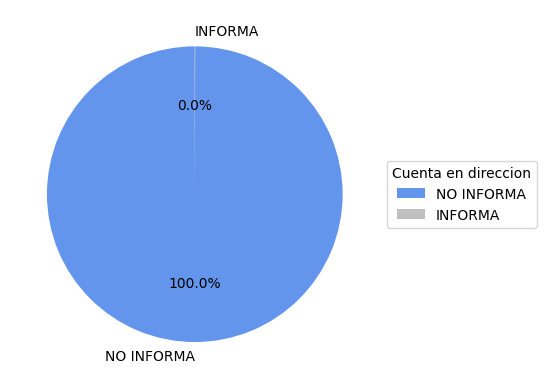

In [44]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_direccion = df_Ciudadania_digital['DIRECCION'].value_counts()

# establecer etiquetas y colores
etiquetas = ['NO INFORMA', 'INFORMA']
colores = ['#6495ED','#C0C0C0']

# crear gráfico de torta
plt.pie(df_direccion, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Cuenta en direccion', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_direccion)

> se revisa el nivel educativo de las personas que accedieron a capacitacion

In [45]:
df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

NIVEL EDUCATIVO
No registra             520335
Bachillerato            269403
Profesional             126451
Primaria                 66695
T�cnico                  35999
Tecnol�gico              12744
PENDIENTE CLASIFICAR      8238
Especializaci�n           7605
Técnico                   6361
Maestr�a                  2799
Especialización            947
Maestría                   504
Doctorado                  268
Name: count, dtype: int64

> Reemplazar valores

In [49]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'No registra'			 : 'No registra',
        'Bachillerato'           : 'Bachillerato',
        'Profesional'            : 'Profesional',
        'Primaria'               : 'Primaria',
        'T�cnico'               : 'Tecnico',
        'Tecnol�gico'           : 'Tecnologico',
        'PENDIENTE CLASIFICAR'   : 'No registra',
        'Especializaci�n'       : 'Especializacion',
        'Técnico'                : 'Tecnico',
        'Maestr�a'              : 'Maestria',
        'Especialización'        : 'Especializacion',
        'Maestría'               : 'Maestria',
        'Doctorado'              : 'Doctorado'
}

# Implementar la función .replace
df_Ciudadania_digital['NIVEL EDUCATIVO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

NIVEL EDUCATIVO
No registra        528573
Bachillerato       269403
Profesional        126451
Primaria            66695
Tecnico             42360
Tecnologico         12744
Especializacion      8552
Maestria             3303
Doctorado             268
Name: count, dtype: int64

> Se realiza grafico del nivel educativo

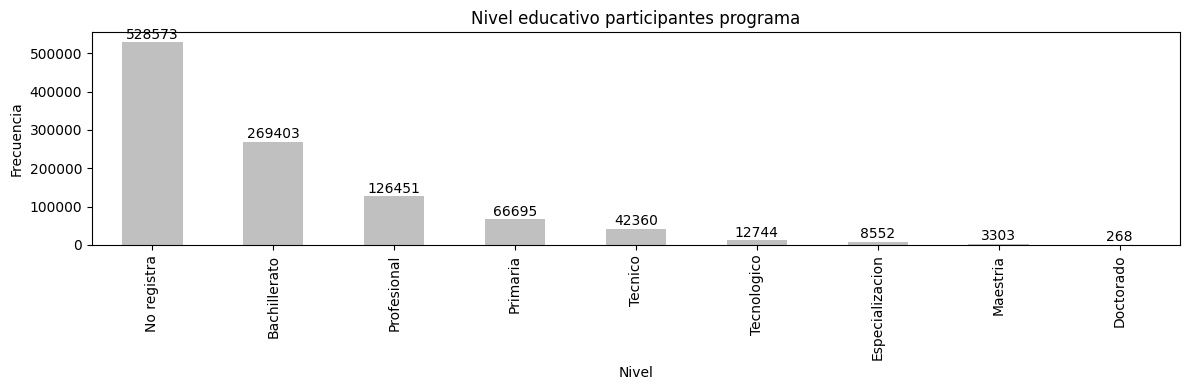

In [50]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
nivel_educativo_counts = df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = nivel_educativo_counts.plot(kind='bar', color='#C0C0C0')

# Añadir la cantidad en cada barra
for i, v in enumerate(nivel_educativo_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Nivel educativo participantes programa')
plt.xlabel('Nivel')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Sector al que pertenecen

In [54]:
df_Ciudadania_digital['SECTOR'].value_counts()

SECTOR
Urbano    447115
Rural      53304
0          11806
URBANO      4592
RURAL        522
-             98
Otro           4
Name: count, dtype: int64

> Se realiza la validaciòn y correcciòn de lainformaciòn del sector que realizo el curso

In [56]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'Urbano'	: 'Urbano',
        'Rural'     : 'Rural',
        '0'         : 'No Informa',
        'URBANO'    : 'Urbano',
        'RURAL'     : 'Rural',
        '-'         : 'No Informa',
        'Otro'      : 'No Informa'
}

# Implementar la función .replace
df_Ciudadania_digital['SECTOR'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['SECTOR'].value_counts()

SECTOR
Urbano        451707
Rural          53826
No Informa     11908
Name: count, dtype: int64

> Se realiza la grafica para ver como se viene presentando la participacion por sectordes donde viven 

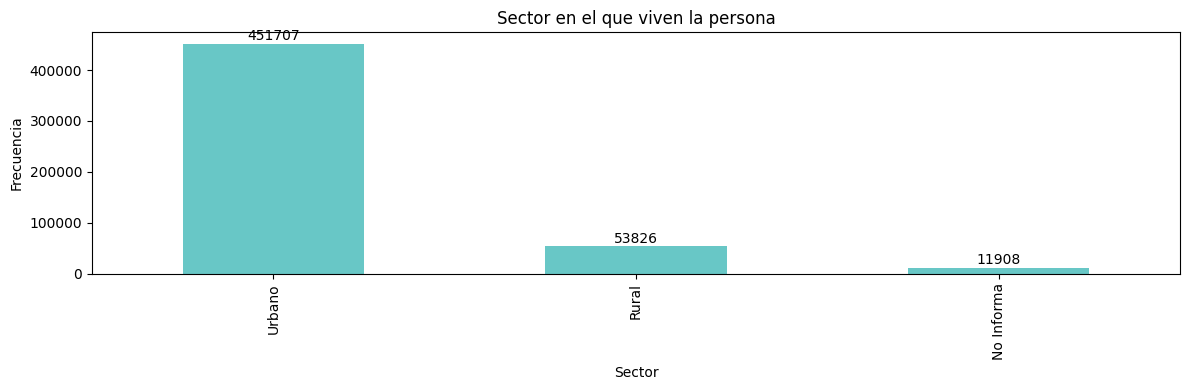

In [58]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
sector_counts = df_Ciudadania_digital['SECTOR'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = sector_counts.plot(kind='bar', color='#68C7C6')

# Añadir la cantidad en cada barra
for i, v in enumerate(sector_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Sector en el que viven la persona')
plt.xlabel('Sector')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Se realiza la validaciòn del estrato donde viven los participantes

In [59]:
df_Ciudadania_digital['ESTRATO'].value_counts()

ESTRATO
PENDIENTE CLASIFICAR    523664
Estrato 2               202396
Estrato 1               187872
Estrato 3               133769
Estrato 4                 7873
Estrato 5                 1853
Estrato 6                  764
No registra                158
Name: count, dtype: int64

> Se realiza el ajuste para ahorrar memoria computacional, con los estratos

In [61]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'PENDIENTE CLASIFICAR'	: 'No registra',
        'Estrato 2'           : '2',
        'Estrato 1'           : '1',
        'Estrato 3'           : '3',
        'Estrato 4'           : '4',
        'Estrato 5'           : '5',
        'Estrato 6'           : '6',
        'No registra'         : 'No registra'
}

# Implementar la función .replace
df_Ciudadania_digital['ESTRATO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['ESTRATO'].value_counts()

ESTRATO
No registra    523822
2              202396
1              187872
3              133769
4                7873
5                1853
6                 764
Name: count, dtype: int64

> Se hace grafico de barrar para ver cuales son los estratos que mas participaron en el programa

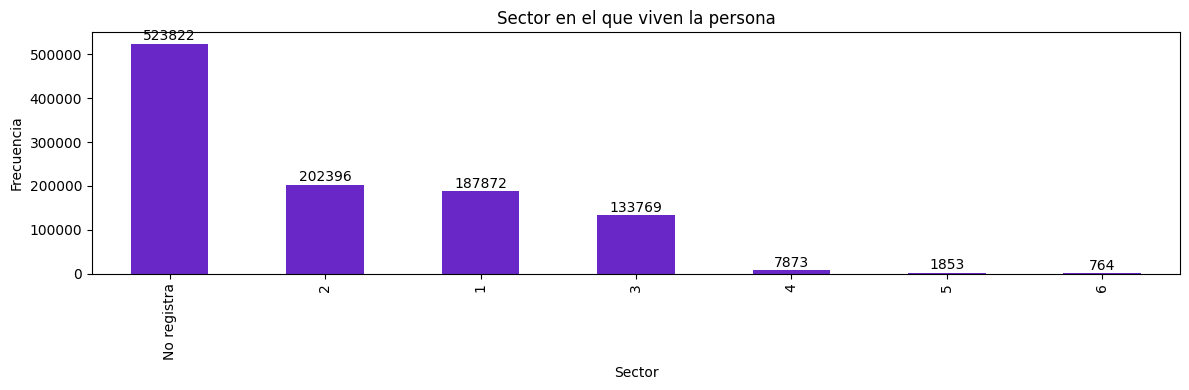

In [62]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
estrato_counts = df_Ciudadania_digital['ESTRATO'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = estrato_counts.plot(kind='bar', color='#6827C6')

# Añadir la cantidad en cada barra
for i, v in enumerate(estrato_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Sector en el que viven la persona')
plt.xlabel('Sector')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> En esta parte vamos a realizar la validacion de fecha

In [63]:
df_Ciudadania_digital['FECHA DE NACIMIENTO'].unique().tolist()

[nan,
 '1942-09-20 00:00:00.0000000',
 '1970-03-19 00:00:00.0000000',
 '1985-11-27 00:00:00.0000000',
 '2000-01-19 00:00:00.0000000',
 '2004-02-13 00:00:00.0000000',
 '1970-07-15 00:00:00.0000000',
 '1979-12-24 00:00:00.0000000',
 '1989-05-18 00:00:00.0000000',
 '1999-10-10 00:00:00.0000000',
 '1990-05-31 00:00:00.0000000',
 '1985-07-13 00:00:00.0000000',
 '1995-08-02 00:00:00.0000000',
 '1961-01-13 00:00:00.0000000',
 '1989-05-21 00:00:00.0000000',
 '1963-08-15 00:00:00.0000000',
 '1984-04-21 00:00:00.0000000',
 '1983-04-25 00:00:00.0000000',
 '1980-01-01 00:00:00.0000000',
 '1990-09-27 00:00:00.0000000',
 '2001-01-24 00:00:00.0000000',
 '2004-01-27 00:00:00.0000000',
 '1986-11-23 00:00:00.0000000',
 '1987-01-01 00:00:00.0000000',
 '1963-04-29 00:00:00.0000000',
 '1995-08-16 00:00:00.0000000',
 '1989-12-09 00:00:00.0000000',
 '1960-11-20 00:00:00.0000000',
 '1991-02-01 00:00:00.0000000',
 '1998-05-01 00:00:00.0000000',
 '1970-06-09 00:00:00.0000000',
 '1979-08-12 00:00:00.0000000',
 '

> Se realiza la conversiòn del campo para que quede como fecha

In [65]:
# se realiza la conversión del campo
df_Ciudadania_digital['FECHA DE NACIMIENTO'] = pd.to_datetime(df_Ciudadania_digital['FECHA DE NACIMIENTO'], errors='coerce')
# validamos como quedo la fecha en este momento
# mostrar resultados
df_Ciudadania_digital['FECHA DE NACIMIENTO'].value_counts()


FECHA DE NACIMIENTO
1980-01-01    92472
1987-01-01    28296
1989-12-09     5357
1989-11-02     1522
1985-01-21     1517
              ...  
1952-02-27        1
1946-10-06        1
1951-05-01        1
1943-11-04        1
1931-05-06        1
Name: count, Length: 23867, dtype: int64

> se realiza revisión del campo edad para ver a que se refiere este campo, ya que se observa que agrupa algunos registros de edad

In [66]:
df_Ciudadania_digital['EDAD'].unique().tolist()

[nan,
 '8 a 13',
 '18 a 25',
 '14 a 17',
 '28 years 15 days',
 '33 years 15 days',
 '23 years 15 days',
 '57 years 15 days',
 '29 years 15 days',
 '55 years 15 days',
 '38 years 15 days',
 '17 years 15 days',
 '26 a 45',
 '31 years 15 days',
 '0',
 '46 a 59',
 '58 years 15 days',
 '20 years 15 days',
 '53',
 '48 years 15 days',
 '39 years 15 days',
 '35 years 15 days',
 '34',
 '18 years 15 days',
 '56 years 15 days',
 '20',
 '26 years 15 days',
 '56',
 '32 years 15 days',
 '25 years 15 days',
 '36 years 15 days',
 '26',
 '19 years 15 days',
 '13',
 '44 years 15 days',
 '41 years 15 days',
 '34 years 15 days',
 '40 years 15 days',
 '22 years 15 days',
 '42 years 15 days',
 '47 years 15 days',
 '47',
 '54 years 15 days',
 '70 years 15 days',
 '43 years 15 days',
 '59 years 15 days',
 '21 years 15 days',
 '16 years 15 days',
 '15 years 15 days',
 '48',
 '30 years 15 days',
 'De 26 a 45',
 '37 years 15 days',
 '28',
 '24 years 15 days',
 '71 years 15 days',
 '27 years 15 days',
 '64 years 

> Se revisa este registro, y se valida que tiene informaciòn mixta que se puede calcular, por lo que elimina

In [71]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['EDAD'])
print("\nDataFrame después de eliminar la columna 'EDAD':")


DataFrame después de eliminar la columna 'EDAD':


> Se realiza la validaciòn del genero

In [72]:
df_Ciudadania_digital['GENERO'].unique().tolist()

[nan, 'Femenino', 'Masculino', 'PENDIETE CLASIFICAR', 'PENDIENTE CLASIFICAR']

In [74]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'na'	              : 'No registra',
        'Femenino'             : 'F',
        'Masculino'            : 'M',
        'PENDIETE CLASIFICAR'  : 'No registra',
        'PENDIENTE CLASIFICAR'  : 'No registra'

}

# Implementar la función .replace
df_Ciudadania_digital['GENERO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['GENERO'].value_counts()

GENERO
F              488038
M              412263
No registra      6532
Name: count, dtype: int64

> Grafica para valdiar el genero quemas cursos toma

GENERO
F              488038
M              412263
No registra      6532
Name: count, dtype: int64


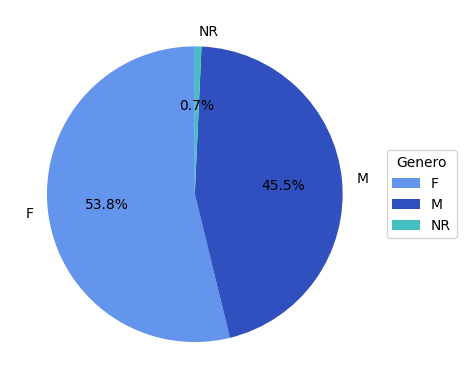

In [75]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_genero = df_Ciudadania_digital['GENERO'].value_counts()

# establecer etiquetas y colores
etiquetas = ['F', 'M','NR']
colores = ['#6495ED','#3150C0', '#45C0C0']

# crear gráfico de torta
plt.pie(df_genero, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Genero', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_genero)